## HR Analytics: Job Change of Data Scientists
### Predict who will move to a new job
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.



#### Features

    - enrollee_id : Unique ID for candidate

    - city: City code

    - city_ development _index : Developement index of the city (scaled)

    - gender: Gender of candidate

    - relevent_experience: Relevant experience of candidate

    - enrolled_university: Type of University course enrolled if any

    - education_level: Education level of candidate

    - major_discipline :Education major discipline of candidate

    - experience: Candidate total experience in years

    - company_size: No of employees in current employer's company

    - company_type : Type of current employer

    - lastnewjob: Difference in years between previous job and current job

    - training_hours: training hours completed

    - target: 0 – Not looking for job change, 1 – Looking for a job change



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 1.Get Data

In [2]:
df = pd.read_csv('../1.original_data/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### 2.Data Understanding and EDA

In [3]:
df.shape

(19158, 14)

- The data contains 19158 Rows and 14 columns includes Target variable. This is a reasonable size and will allow me to work in Jupyter notebooks

In [4]:
## General information about data featuers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

- The most of features dtype is 'object', its mean we work with categorical data.
- There are many features contains missing values.

In [5]:
## statistical summary
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
## check for uniquness 
for col in list(df.columns):
    print(f"{col} --> {df[col].nunique()}")
    

enrollee_id --> 19158
city --> 123
city_development_index --> 93
gender --> 3
relevent_experience --> 2
enrolled_university --> 3
education_level --> 5
major_discipline --> 6
experience --> 22
company_size --> 8
company_type --> 6
last_new_job --> 6
training_hours --> 241
target --> 2


#### Univariate Exploration

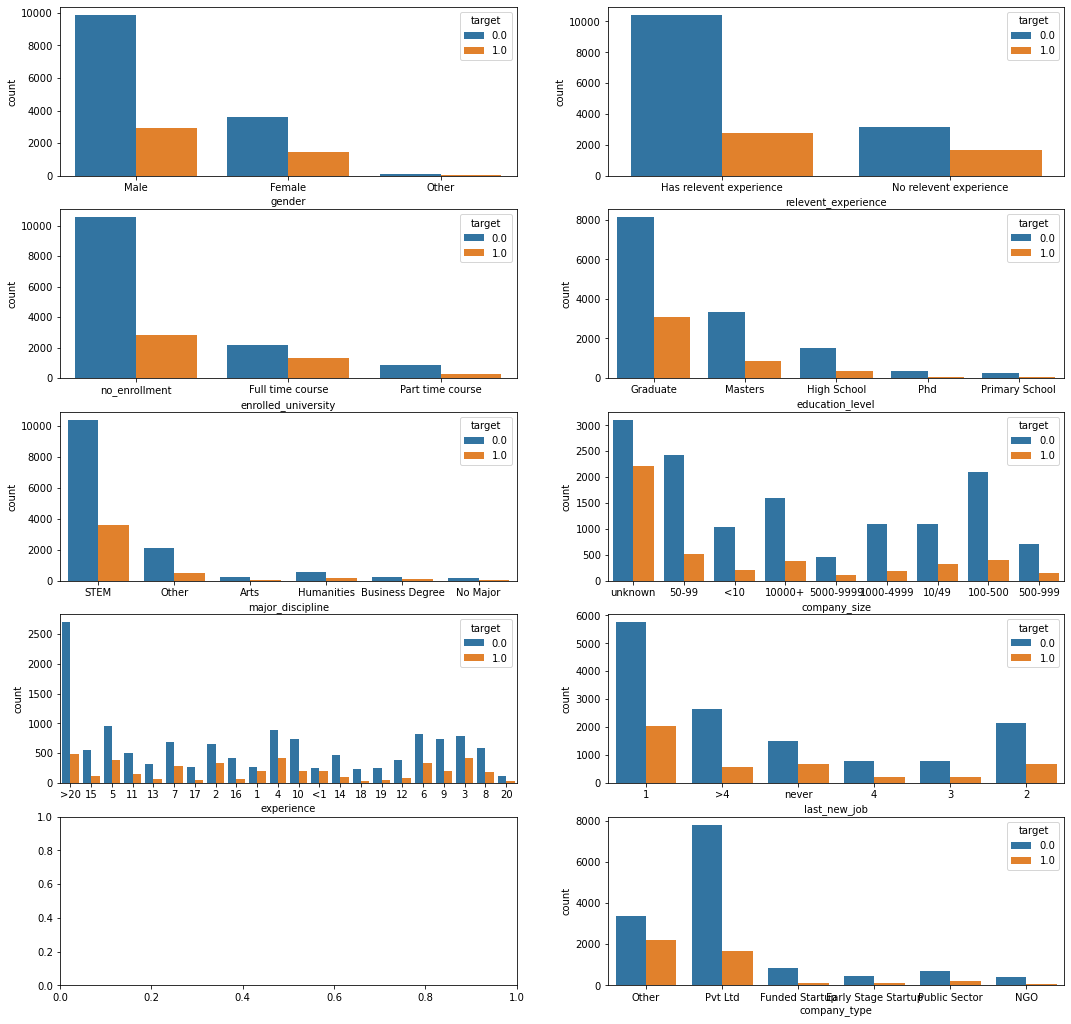

In [28]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[18,18])
sns.countplot(x='gender', data=df, hue='target', ax=ax[0][0])
sns.countplot(x='relevent_experience', data=df, hue='target', ax=ax[0][1])
sns.countplot(x='enrolled_university', data=df, hue='target', ax=ax[1][0])
sns.countplot(x='education_level', data=df, hue='target', ax=ax[1][1])
sns.countplot(x='major_discipline', data=df, hue='target', ax=ax[2][0])
sns.countplot(x='company_size', data=df, hue='target', ax=ax[2][1])
sns.countplot(x='experience', data=df, hue='target', ax=ax[3][0])
sns.countplot(x='last_new_job', data=df, hue='target', ax=ax[3][1])
sns.countplot(x='company_type', data=df, hue='target', ax=ax[4][1])
plt.show()

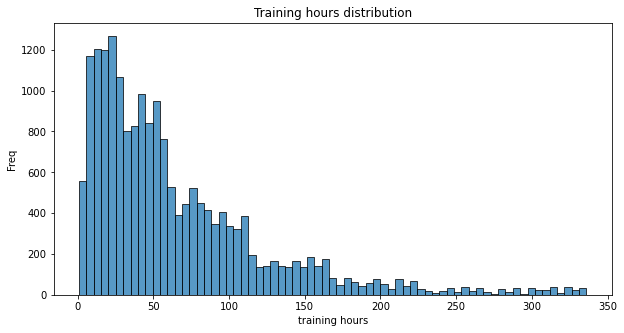

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(x='training_hours', data=df)
plt.xlabel('training hours')
plt.ylabel('Freq')
plt.title('Training hours distribution')
plt.show()

- One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

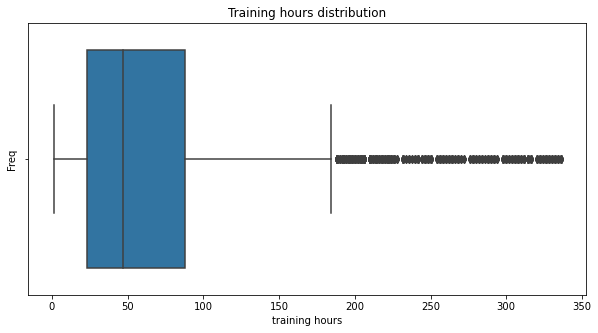

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='training_hours', data=df)
plt.xlabel('training hours')
plt.ylabel('Freq')
plt.title('Training hours distribution')
plt.show()

- we should dealing with outliers in Feature Engineering process

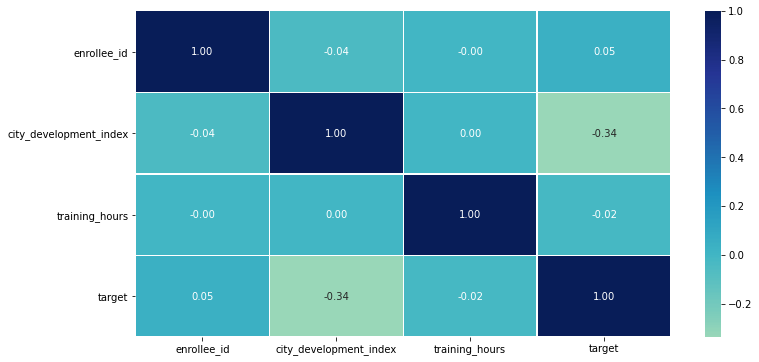

In [38]:
## Check for the correlations between variables
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, center=0, linewidths=.5, cmap="YlGnBu", fmt='.2f')
plt.show()

- as we see that city_development index is highly correlated with target variable

### Limitation and Conclousion:
    - The data contains 19158 Rows and 14 columns includes Target variable. This is a reasonable size and will allow me to work in Jupyter notebooks
    - The most of features dtype is 'object', its mean we work with categorical data.
    - There are many features contains missing values.
    - we should to make some transformations on the features like 'relevant_exprience' to change values to 'yes', or 'no', and 'Experience', and company size.
    - The distribution of training hours seems to be skewed right.
    - There are systematic algorithms that we can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique
    - One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.
    - city_development index is highly correlated with target variable
- some information: Most of the people whome participate in our courses are 'male' and they have a 'relevant experience' in the field and they graduates or complete the master degree.
- STEM Students are more intersted in data science more than another discplines

### 3.Data Cleaning

#### A. Handle Missing Data

In [10]:
## Check for missingness among all features
df.isna().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

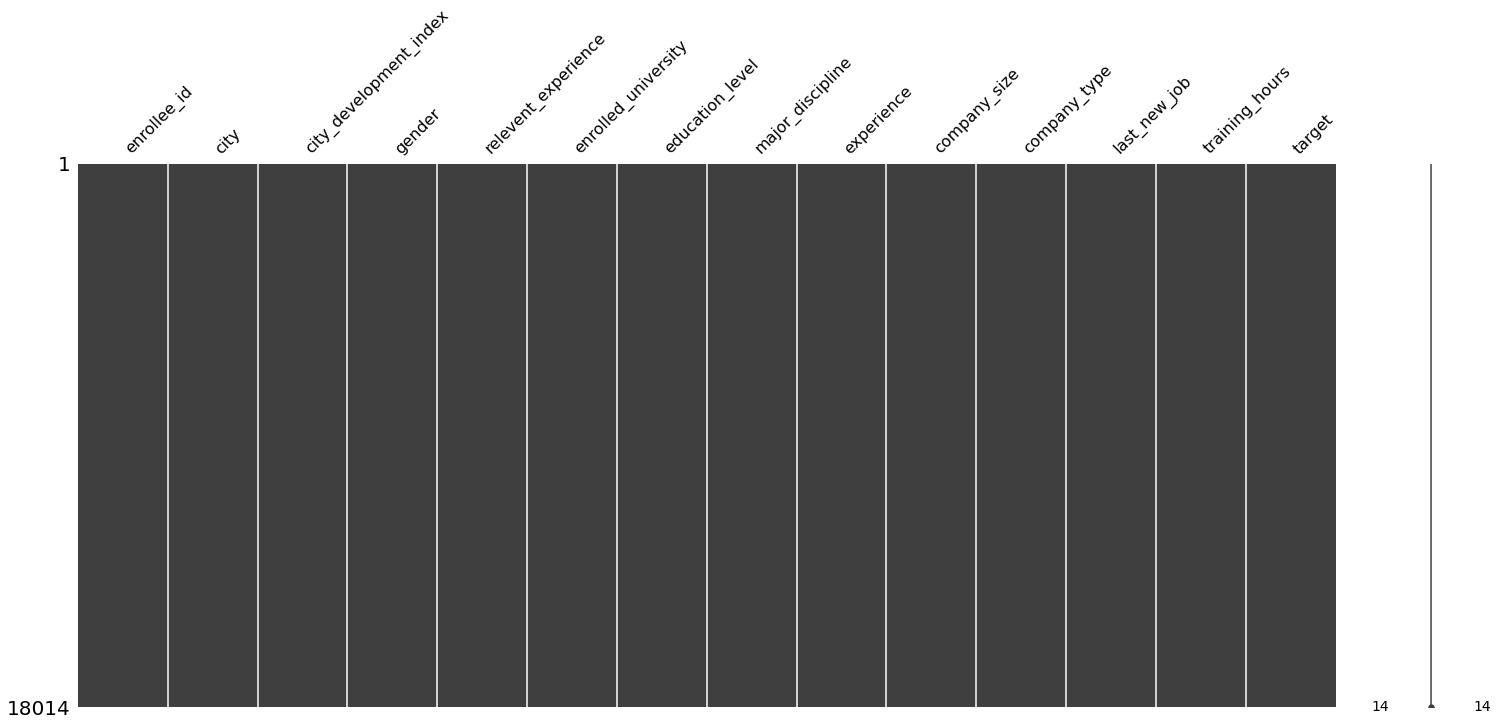

In [25]:
msno.matrix(df)
plt.show()

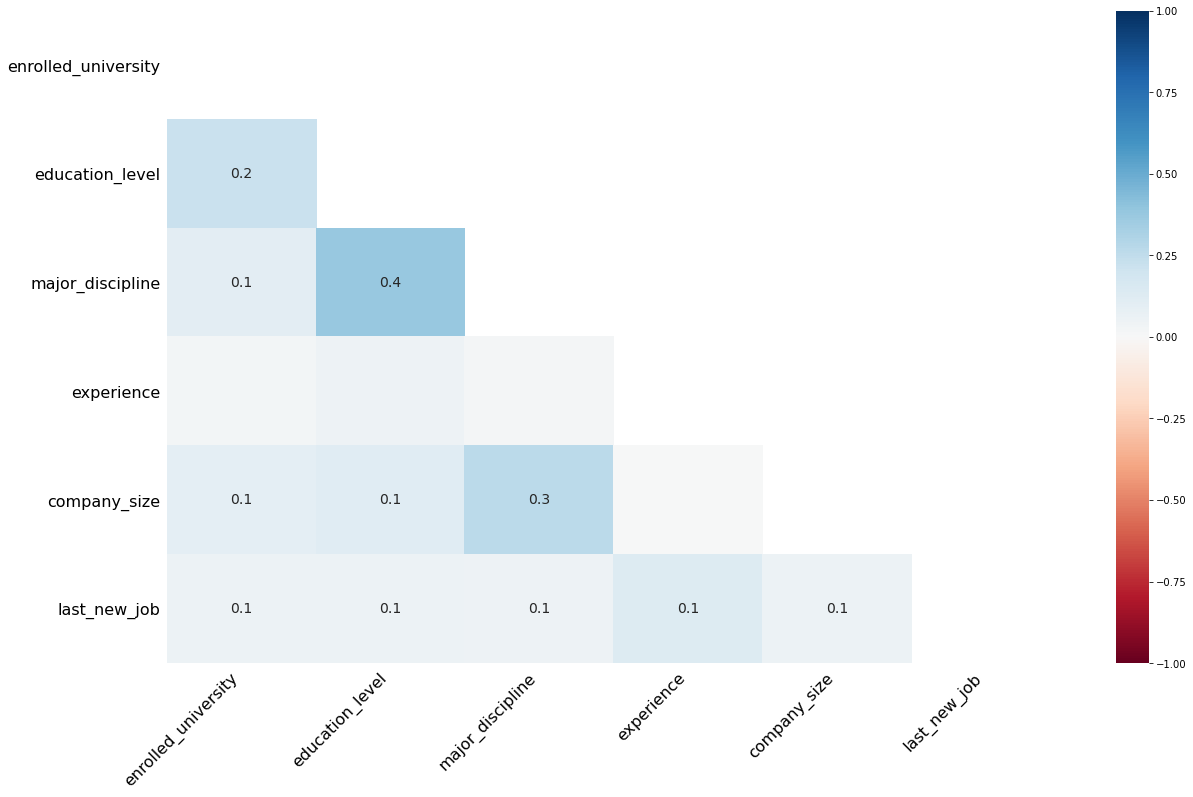

In [20]:
msno.heatmap(df)
plt.show()

##### Handle Missing values in 'gender' by assign 'Female' to missing values
- choose this method to handle missing values since the data are imbalanced

In [15]:
df['gender'].value_counts()

Male      13221
Female     5746
Other       191
Name: gender, dtype: int64

In [14]:
## Use simple imputer to handle missing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Female')
imputer.fit(df[['gender']])
df['gender'] = imputer.transform(df[['gender']]).ravel()

##### Handle missing value in company size and company type

In [19]:
df['company_type'].fillna('Other', inplace=True)

In [22]:
df['company_size'].fillna('unknown', inplace=True)

In [23]:
df['major_discipline'].fillna('Other', inplace=True)

In [24]:
df.dropna(inplace=True)

In [27]:
df.shape

(18014, 14)

In [42]:
df.to_csv('df_cleaned.csv', index=False)